# Bolsa de valores

Prevendo o volume de ações utilizando o modelo Random Forest Regressor

* Utilizaremos dados do Yahoo Finance da PETR4 num intervalo de tempo específico

* Dados serão obtido através da biblioteca Pandas DataReader

Importando bibliotecas

In [3]:
!pip install pandas_datareader

In [4]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

Definindo janela de tempo

In [5]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,9,30)

Obtendo dados da PETR4

In [6]:
PETR4 = web.DataReader('PETR4.SA',"yahoo",start,end)

Exibindo as cinco primeiras linhas

In [7]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,8.335218
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,8.410766
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,8.425874
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,8.476238
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,8.576966


Exibindo as cinco últimas linhas

In [8]:
PETR4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-24,20.709999,20.059999,20.240000,20.400000,76310000.0,11.074918
2020-09-25,20.260000,19.870001,20.150000,20.129999,40150400.0,10.928338
2020-09-28,20.559999,19.629999,20.330000,19.629999,48797400.0,10.656894
2020-09-29,19.860001,19.250000,19.629999,19.309999,52878100.0,10.483169
2020-09-30,20.040001,19.430000,19.500000,19.610001,69505000.0,10.646036


Graficando valores de abertura, fechamento, mínimo e máximo

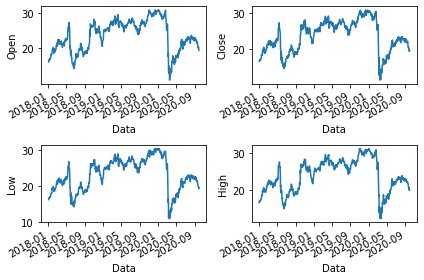

In [9]:
plt.subplot(2,2,1)
PETR4['Open'].plot(label='Open')
plt.xlabel('Data')
plt.ylabel('Open')
plt.subplot(2,2,2)
PETR4['Close'].plot(label='Close')
plt.xlabel('Data')
plt.ylabel('Close')
plt.subplot(2,2,3)
PETR4['Low'].plot(label='Low')
plt.xlabel('Data')
plt.ylabel('Low')
plt.subplot(2,2,4)
PETR4['High'].plot(label='High')
plt.xlabel('Data')
plt.ylabel('High')
plt.tight_layout()

Definindo variáveis X e Y

In [10]:
X = PETR4.drop(['Volume','Adj Close'],axis=1)
Y = PETR4['Volume']

* Criando amostra de treino e teste

In [11]:
X_treino = X[X.index<'2020-01-01'].values
X_teste = X[X.index>='2020-01-01'].values

Y_treino = Y[X.index<'2020-01-01'].values
Y_teste = Y[X.index>='2020-01-01'].values

* Prevendo volume utilizando modelo Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rfr = RandomForestRegressor()

In [14]:
rfr.fit(X_treino,Y_treino)

RandomForestRegressor()

In [15]:
Y_previsto = rfr.predict(X_teste)

* Graficando Y_previsto em função de Y_teste

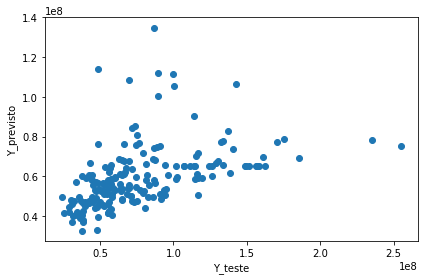

In [16]:
plt.scatter(Y_teste,Y_previsto)
plt.xlabel('Y_teste')
plt.ylabel('Y_previsto')
plt.tight_layout()

Calculando métricas de erro

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
MAE = mean_absolute_error(Y_teste,Y_previsto)
MAPE = mean_absolute_percentage_error(Y_teste,Y_previsto)
MSE = mean_squared_error(Y_teste,Y_previsto)
RMSE = np.sqrt(MSE)

In [20]:
print("MAE = {:0.2e}".format(MAE))
print("MAPE = {:0.2f}%".format(MAPE))
print("MSE = {:0.2e}".format(MSE))
print("RMSE = {:0.2e}".format(RMSE))

MAE = 2.56e+07
MAPE = 28.46%
MSE = 1.50e+15
RMSE = 3.87e+07


Podemos prever o valor com uma incerteza de 28.78%

Melhorias podem ser obtidas adicionando-se indicores da bolsa na amostra